<a href="https://colab.research.google.com/github/SSAC-AI/YOLO/blob/main/0717_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

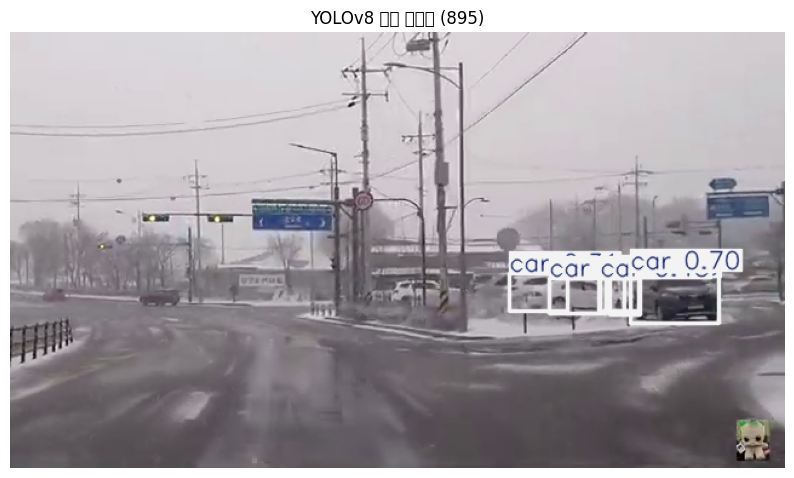

‚úÖ ÏòÅÏÉÅ Ï∂îÎ°† Ï¢ÖÎ£å, Ï†ÄÏû• ÌååÏùº: output_with_yolo.mp4


In [10]:
def play_and_save_youtube_with_yolo(youtube_url, skip_frames=5, output_filename="output_with_yolo.mp4", max_duration=30):
    """
    max_duration: ÏµúÎåÄ Ï≤òÎ¶¨ ÏãúÍ∞Ñ(Ï¥à)
    """
    ydl_opts = {
        'format': 'mp4/best[height<=480]',
        'outtmpl': tempfile.gettempdir() + '/temp_video.%(ext)s',
        'quiet': True,
    }

    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            print("‚¨áÔ∏è Ïú†ÌäúÎ∏å ÏòÅÏÉÅ Îã§Ïö¥Î°úÎìú Ï§ë...")
            info = ydl.extract_info(youtube_url, download=True)
            video_path = ydl.prepare_filename(info)

            print(f"üé• ÏòÅÏÉÅ Ï†úÎ™©: {info['title']}")

            cap = cv2.VideoCapture(video_path)
            fps = cap.get(cv2.CAP_PROP_FPS)
            frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

            max_frames = int(fps * max_duration)
            print(f"‚è± ÏµúÎåÄ {max_duration}Ï¥à (ÏïΩ {max_frames} ÌîÑÎ†àÏûÑ) Ï≤òÎ¶¨")

            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            out = cv2.VideoWriter(output_filename, fourcc, fps / skip_frames, (frame_width, frame_height))

            frame_num = 0
            processed_frames = 0

            while True:
                ret, frame = cap.read()
                if not ret:
                    break
                if frame_num >= max_frames:
                    break

                if frame_num % skip_frames == 0:
                    results = model.predict(frame, imgsz=640, verbose=False)[0]
                    annotated_frame = results.plot()
                    out.write(annotated_frame)

                    clear_output(wait=True)
                    plt.figure(figsize=(10, 6))
                    plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
                    plt.title(f"YOLOv8 Ï∂îÎ°† ÌîÑÎ†àÏûÑ ({frame_num})")
                    plt.axis('off')
                    plt.show()

                    time.sleep(0.1)

                frame_num += 1

            cap.release()
            out.release()
            os.remove(video_path)
            print(f"‚úÖ ÏòÅÏÉÅ Ï∂îÎ°† Ï¢ÖÎ£å, Ï†ÄÏû• ÌååÏùº: {output_filename}")

    except Exception as e:
        print(f"‚ùå Ïò§Î•ò Î∞úÏÉù: {e}")

# Ïã§Ìñâ
youtube_url = input("Ïú†ÌäúÎ∏å ÏòÅÏÉÅ URL ÏûÖÎ†•: ")
play_and_save_youtube_with_yolo(youtube_url, skip_frames=5, max_duration=30)
